## 1. Iris Dataset의 개요
- 꽃받침 : Sepal  
- 꽃잎 : Petal  
- 붓꽃 종류 : Setosa, Versicolor, Virginica

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

<img src="https://i.imgur.com/RcxYYBA.png">


## 2. 데이터 불러오기

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [34]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris_dataset['DESCR'][:500])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                



In [4]:
print(iris_dataset['feature_names'])
print(iris_dataset['data'].shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


In [5]:
import pandas as pd
iris_df = pd.DataFrame(iris_dataset['data'], columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
print(iris_dataset['target_names']) # 타겟 데이터 이름 출력하기
print(type(iris_dataset['target'])) # 속성 데이터 타입 출력하기
print(iris_dataset['target'].shape) # 타겟 데이터 형태 출력하기
print(iris_dataset['target'])  # 붓꽃 이름 데이터 맨 앞 5개 데이터 출력하기

['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'>
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
iris_df['target'] = iris_dataset['target']
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
target          150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
iris_df.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 3. 탐색적 데이터 분석

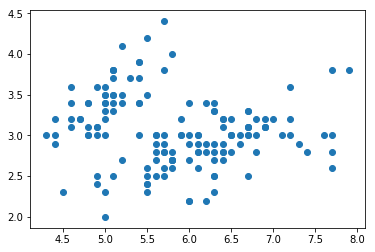

In [35]:
import matplotlib.pyplot as plt
plt.scatter(iris_df['sepal length'],iris_df['sepal width'])
plt.show()

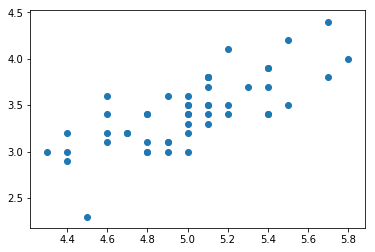

In [36]:
setosa_df = iris_df[iris_df['target']==0] # setosa 데이터만 살펴보기
plt.scatter(setosa_df['sepal length'],setosa_df['sepal width'])
plt.show()

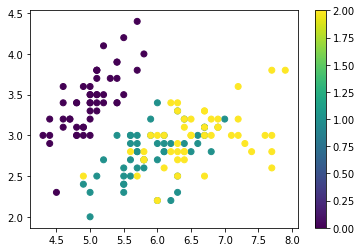

In [13]:
plt.scatter(iris_df['sepal length'],iris_df['sepal width'], c = iris_df.target)
plt.colorbar()
plt.show()

## Tip) Seaborn 라이브러리 - 조금 더 시각화를 편리하게 도와주는 라이브러리

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


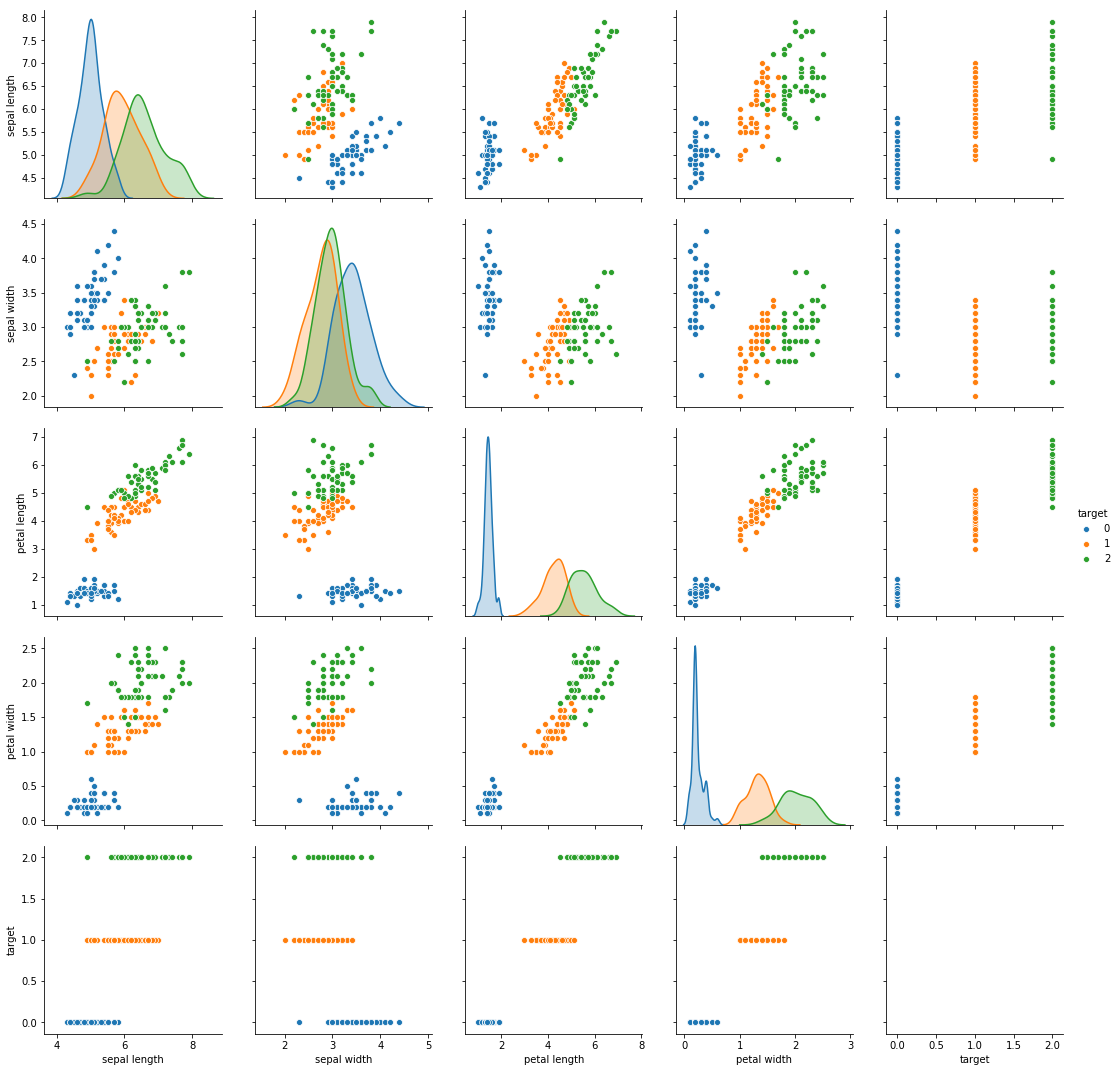

In [14]:
import seaborn as sns
sns.pairplot(iris_df,hue='target',size=3)
plt.show()

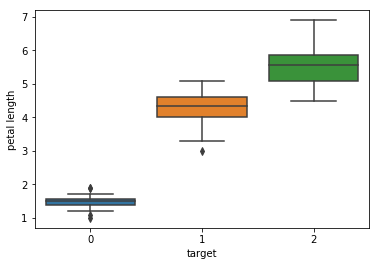

In [15]:
sns.boxplot(x='target',y='petal length', data=iris_df)
plt.show()

## 4. Iris 머신러닝 연습 - 결정 트리, KNN으로 학습하기

In [38]:
#1. 학습 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris_dataset.data,iris_dataset.target)

#2. 알고리즘 결정하기 - 결정트리
from sklearn.tree import DecisionTreeClassifier
dt_classifier=DecisionTreeClassifier()

#3. 학습 데이터로 학습하기
dt_classifier.fit(x_train,y_train)

#4. 테스트 데이터로 예측하기
pred = dt_classifier.predict(x_test)

#5. 평가하기(정확도)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.9473684210526315


In [39]:
#1. 학습 데이터와 테스트 데이터로 나누기(생략)

#2. 알고리즘 결정하기 - 결정트리
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier()

#3. 학습 데이터로 학습하기
kn_classifier.fit(x_train,y_train)

#4. 테스트 데이터로 예측하기
pred = kn_classifier.predict(x_test)

#5. 평가하기(정확도)
print(accuracy_score(y_test,pred))

0.9736842105263158
